LAB3 Zhicong Zhang, Dale Song

# problem1

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
%matplotlib inline

v1 = np.array([1, 0, 1, 2])
v2 = np.array([2, 1, 4, 11])
v3 = np.array([3, 0, 3, 6])
v4 = np.array([4, 1, 6, 15])
orig_mat = np.matrix([v1, v2, v3, v4])

v1 = np.array([1, 0, 1, 2, 4])
v2 = np.array([2, 1, 4, 11, 18])
v3 = np.array([3, 0, 3, 6, 12])
v4 = np.array([4, 1, 6, 15, 26])
inspan_mat = np.matrix([v1, v2, v3, v4])

v1 = np.array([1, 0, 1, 2, 1])
v2 = np.array([2, 1, 4, 11, 3])
v3 = np.array([3, 0, 3, 6, 1])
v4 = np.array([4, 1, 6, 15, 4])
nonspan_mat = np.matrix([v1, v2, v3, v4])

orig_reduced = sympy.Matrix(orig_mat).rref()
inspan_reduced = sympy.Matrix(inspan_mat).rref()
nonspan_reduced = sympy.Matrix(nonspan_mat).rref()
print ("Original pivot rows: ",len(orig_reduced[1]))
print ("Matrix 1 pivot rows: ",len(inspan_reduced[1]))
print ("Matrix 2 pivot rows: ",len(nonspan_reduced[1]))


Original pivot rows:  2
Matrix 1 pivot rows:  2
Matrix 2 pivot rows:  3


By making augmented matrixes, from result shown, inspan matrix does not add more pivot rows, however, not inspan matrix add more pivot rows.

1B

In [2]:
rank = len(orig_reduced[1])
print("Subspace rank of matrix: ",rank," for \n{}".format(orig_mat))


Subspace rank of matrix:  2  for 
[[ 1  0  1  2]
 [ 2  1  4 11]
 [ 3  0  3  6]
 [ 4  1  6 15]]


1C

In [3]:
q,r = np.linalg.qr(orig_mat)
print('Orthonormal col basis for the subspace S:\n',q[:, :rank])


Orthonormal col basis for the subspace S:
 [[-0.18257419  0.2236068 ]
 [-0.36514837 -0.67082039]
 [-0.54772256  0.67082039]
 [-0.73029674 -0.2236068 ]]


A vector v=(v1,v2,v3,v4)v=(v1,v2,v3,v4) is orthogonal to uu iff v1−v2+v3−v4=0v1−v2+v3−v4=0, or in other words v4=v1−v2+v3
q is a set of orthogonal vectors which span the column space of A. There are posibily countless many basis for subspace S, q is one of them. But we need the basis to consist of columns of A, then you can compute the QR decomposition and throw out the linearly dependent columns. Which means just take up to rank many columns.

~~~~~~~~~
1D Solve the optimization problem minx∈S||x − z∗||2 where z∗ = [1, 0, 0, 0].
~~~~~~~~~

In [5]:
obasis = q[:, :rank].T
v1 = obasis[0]
v2 = obasis[1]
z = [1,0,0,0]
#projwZ =np.matmul(( np.matmul(v1,z)/np.matmul(v1,v1) ),v1)+ np.matmul((np.matmul(v2,z)/np.matmul(v2,v2)),v2)

The set of vectors of the form c1v1 + c2v2 is simply the span of v1 and v2, i.e.,Span{v1, v2}, so to find the best approximation to z by vectors in this span we just need to project z onto it. For notation, let W = Span{v1, v2}, then the best approximation to z will be given by
    projwZ =( v1*z/v1*v1 )v1+ (v2*z/v2*v2)v2



# #2

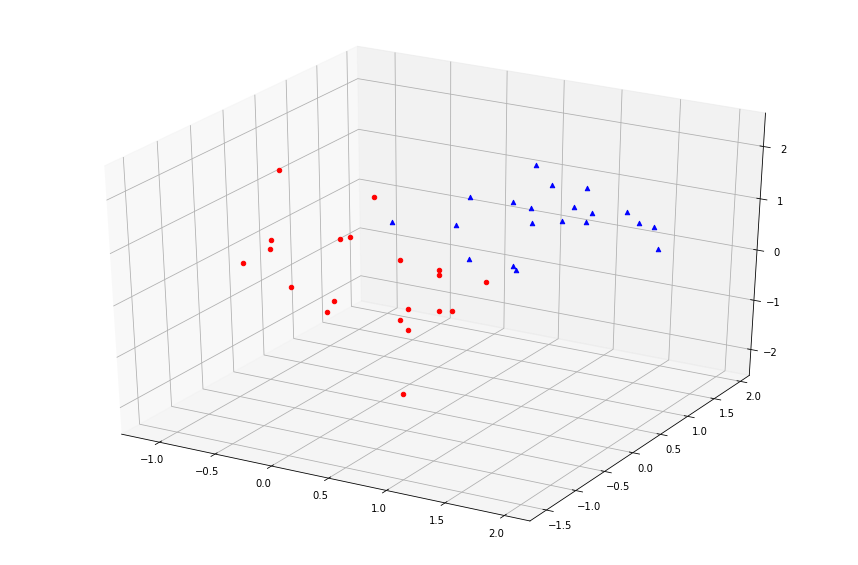

In [6]:
#2.1
from mpl_toolkits.mplot3d import Axes3D

cov_matrix_0 = [[0.5, 0, 0],
             [0, 0.5, 0],
             [0, 0, 0.7]]

cov_matrix_1 = [[0.5, 0, 0],
             [0, 0.5, 0],
             [0, 0, 0.01]]

zero_mean_gauss = np.random.multivariate_normal([0,0,0], cov_matrix_0, 20)
one_mean_gauss = np.random.multivariate_normal([1,1,1], cov_matrix_1, 20)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(0,20):
    x_0 = zero_mean_gauss[i][0]
    x_1 = one_mean_gauss[i][0]
    y_0 = zero_mean_gauss[i][1]
    y_1 = one_mean_gauss[i][1]
    z_0 = zero_mean_gauss[i][2]
    z_1 = one_mean_gauss[i][2]
    
    ax.scatter(x_0, y_0, z_0, c='r', marker='o')
    ax.scatter(x_1, y_1, z_1, c='b', marker = '^')
    

plt.show()

In [7]:
#2.3
X = np.concatenate((zero_mean_gauss, one_mean_gauss), axis=0)

def find_cov(X, Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    summation = 0
    for (x,y) in zip(X, Y):
        summation += (x - X_mean)*(y - Y_mean)
    covariance = summation/len(X)
    return covariance

dim_x = X[:,0]
dim_y = X[:,1]
dim_z = X[:,2]

var_x = find_cov(dim_x, dim_x)
var_y = find_cov(dim_y, dim_y)
var_z = find_cov(dim_z, dim_z)

cov_xy = find_cov(dim_x, dim_y)
cov_xz = find_cov(dim_x, dim_z)
cov_yz = find_cov(dim_y, dim_z)

cov_matrix = np.matrix([[var_x, cov_xy, cov_xz], [cov_xy, var_y, cov_yz], [cov_xz, cov_yz, var_z]])
print (cov_matrix)



[[ 0.65132908  0.11963191  0.27705503]
 [ 0.11963191  0.72011935  0.06903048]
 [ 0.27705503  0.06903048  0.68430371]]


[ 1.00692341  0.38507594  0.66375279]
[[-0.6412979  -0.74230858  0.19420343]
 [-0.42177318  0.12960361 -0.89739082]
 [-0.64097144  0.65740465  0.39620037]]
Eigenvector 1: 
[[-0.6412979 ]
 [-0.42177318]
 [-0.64097144]]
Eigenvalue 1 from covariance matrix: 1.0069234065410855
--------------------------------------------------
Eigenvector 2: 
[[-0.74230858]
 [ 0.12960361]
 [ 0.65740465]]
Eigenvalue 2 from covariance matrix: 0.38507593988941696
--------------------------------------------------
Eigenvector 3: 
[[ 0.19420343]
 [-0.89739082]
 [ 0.39620037]]
Eigenvalue 3 from covariance matrix: 0.6637527895548906
--------------------------------------------------


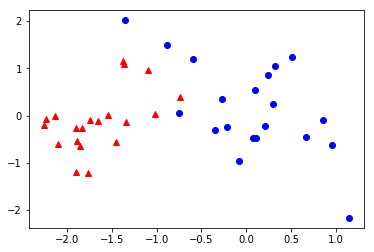

In [11]:
#2.4
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)
print (eigen_val)
print (eigen_vec)

for i in range(len(eigen_val)):
    e_vec = eigen_vec[:,i].reshape(1,3).T
    print('Eigenvector {}: \n{}'.format(i+1, e_vec))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eigen_val[i]))
    print(50 * '-')
    
#create matrix W  for y = WT x X

eigen_pairs = [(eigen_val[i], eigen_vec[:,i]) for i in range(len(eigen_val))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

W_mat = np.hstack((eigen_pairs[0][1], eigen_pairs[1][1]))

y = W_mat.T.dot(X.T)
plt.plot(y[0, 0:20], y[1, 0:20], marker='o', color='blue', label='label1')
plt.plot(y[0, 20:40], y[1, 20:40], marker='^', color='red', label='label2')
plt.show()

# problem3

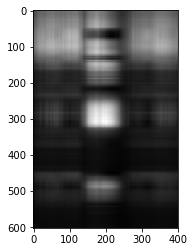

size of picture: 7718400 bits


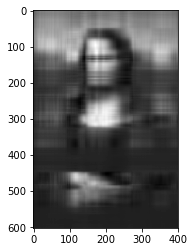

size of picture: 19296000 bits


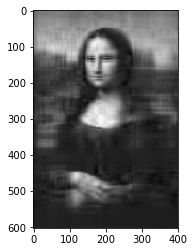

size of picture: 38592000 bits


In [12]:
from scipy import misc

#import matplotlib.pyplot as plt
#plt.imshow(pic, cmap=plt.cm.gray)
#plt.imshow(pic)

for i in [2,5,10]:
    pic = misc.imread('mona_lisa.png',flatten=True) # uses the Image module (PIL)
    u, s, v = np.linalg.svd(pic)
    s[i:] = 0
    Diag = np.zeros(pic.shape)
    Diag[:400, :400] = np.diag(s)
    plt.imshow(np.matmul(np.matmul(u, Diag), v), cmap=plt.cm.gray)
    plt.show()
    print("size of picture: %s bits"%(pic.shape[0]*pic.shape[1]*i*2*8))


# problem4

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib
from scipy.stats import skew
from scipy.stats.stats import pearsonr

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

0.1    0.137775
dtype: float64

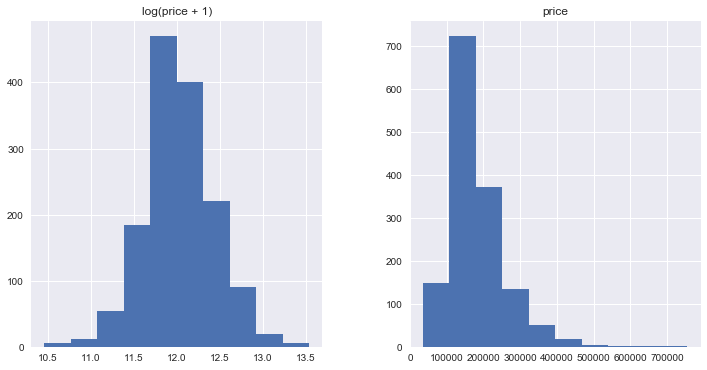

In [15]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data = pd.get_dummies(all_data)
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
model_ridge = Ridge()
alphas = [0.1]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge

# The RMSE value of the ridge regression with alpha = 0.1 was 0.137775 .

# Our own attempt:


There are 32 skewed features
1stFlrSF          1.469604
2ndFlrSF          0.861675
3SsnPorch        11.376065
BedroomAbvGr      0.326324
BsmtFinSF1        1.424989
BsmtFinSF2        4.145323
BsmtFullBath      0.623741
BsmtHalfBath      3.929996
BsmtUnfSF         0.919351
EnclosedPorch     4.003891
Fireplaces        0.733495
FullBath          0.167606
GarageArea        0.241176
GrLivArea         1.269358
HalfBath          0.694566
KitchenAbvGr      4.302254
LotArea          12.822431
LotFrontage       1.502351
LowQualFinSF     12.088761
MSSubClass        1.375457
MasVnrArea        2.601240
MiscVal          21.947195
MoSold            0.195884
OpenPorchSF       2.535114
OverallCond       0.570312
OverallQual       0.197110
PoolArea         16.898328
ScreenPorch       3.946694
TotRmsAbvGrd      0.758367
TotalBsmtSF       1.162285
WoodDeckSF        1.842433
YrSold            0.132399
dtype: float64
Lasso picked 117 variables and eliminated the other 172 variables
Score: 0.930737641296
Alph

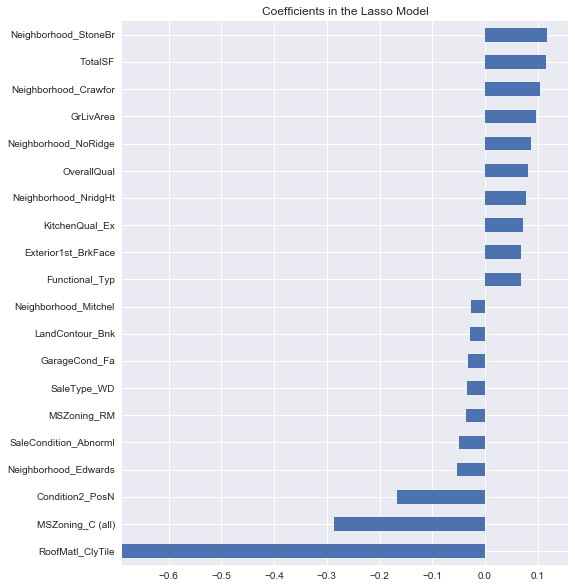

In [16]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

label_name = 'SalePrice'
y = train[label_name]
X = train.drop(label_name,axis=1)

#first let's test if 1stFlrSF and 2ndFlrSF = GrLivArea, always
#for index, row in train.iterrows():
#    if(row['1stFlrSF'] + row['2ndFlrSF'] != row['GrLivArea']):
#        print row['1stFlrSF'], "+", row['2ndFlrSF'], "!=", row['GrLivArea']
        
# as you can see, there are quite a few where 1stFlrSF + 2ndFlrSF != GrLivArea always. let's try to add LowQualFinSF
for index, row in train.iterrows():
    if(row['1stFlrSF'] + row['2ndFlrSF'] + row['LowQualFinSF'] != row['GrLivArea']):
        print (row['1stFlrSF'], "+", row['2ndFlrSF'], "+", row['LowQualFinSF'], "!=", row['GrLivArea'])
        
# sweet, so now we know that 1stFlrSF + 2ndFlrSF + LowQualFinSF = GrLivArea. So let's say that the 
# TotalSF = GrLivArea + TotalBsmtSF
train['TotalSF'] = np.log1p(train['GrLivArea'] + train['TotalBsmtSF'])
test['TotalSF'] = np.log1p(test['GrLivArea'] + test['TotalBsmtSF'])

features = train.columns.difference(['Id','SalePrice'])

train_test = pd.concat((train[features], test[features]))
num_features = train_test.dtypes[train_test.dtypes != "object"].index

skewed_feats = train_test[num_features].apply(lambda x: skew(x.dropna())) #compute skewness

# 0.75 gives 22 skewed features
# 0.6 gives 25
# 0.3 gives 27      0.11793
# 0.2 gives 28 
# 0.18 gives 30     0.11776
# 0.15 gives 31     
# 0.1 gives 32
# 0.0 gives 32      0.11766
# -1 gives 37
# -100 gives 38     0.11692


skewed_feats = skewed_feats[skewed_feats > 0]

print ("There are " + str(len(skewed_feats)) + " skewed features")
print (skewed_feats)

skewed_feats = skewed_feats.index
train_test[skewed_feats] = np.log1p(train_test[skewed_feats])


train["SalePrice"] = np.log1p(train["SalePrice"])
train_test = pd.get_dummies(train_test)

num_train_rows = train.shape[0]


train_test = train_test.fillna(train_test[:num_train_rows].mean())

X_train = train_test[:num_train_rows]
X_test = train_test[num_train_rows:]

y = train.SalePrice
##################
# SCALE FEATURES #
##################
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
X_train_i = X_train.index
X_train_c = X_train.columns
X_test_i = X_test.index
X_test_c = X_test.columns

X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, index=X_train_i, columns=X_train_c)
X_test = pd.DataFrame(X_test_scaled, index=X_test_i, columns=X_test_c)

from sklearn.model_selection import GridSearchCV

lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], selection='random', max_iter=30000)
lasso.fit(X_train, y)
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print ("Score: " + str(lasso.score(X_train, y)))
print ("Alpha: " + str(lasso.alpha_))

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10)
imp_coef.plot(kind = "barh")

plt.title("Coefficients in the Lasso Model")

test_preds = np.expm1(lasso.predict(X_test))
submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = test_preds
submission.to_csv("asdfasdf.csv", index=False)

The best solution we could come up with gave us an RMSE of 0.11884 .
We approached this with the intuition that the total amount of square footage of the house would be a significant factor in buying a house. So our first step was to combine features that gaves us a new feature called TotalSF. We see that TotalSF is in fact an important feature in our set from the bar plot above. Afterwards, we used a RobustScaler to scale our data. Kaggle gave our model a score of 0.11884.